This notebook is for processing the results of the varying refinement simulations on reducing the error on the drag integration method

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

In [2]:
import os
import sys
import gc
import numpy as np
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
match_number = re.compile('-?\ *[0-9]+\.?[0-9]*(?:[Ee]\ *-?\ *[0-9]+)?')

plt.rcParams["font.family"] = "Times New Roman"
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

In [3]:
#regular refined system
dragIntegral_1x = pd.read_csv('2D_cylinder_riblet-1x/2D_riblet/integral_results/drag_over_time.csv',  sep=',\s+', engine='python') #the regular drag integral (volume - non-riblet surfaces)
totClosedIntegral_1x = pd.read_csv('2D_cylinder_riblet-1x/2D_riblet/integral_results/drag_over_time_closedIntegral.csv',  sep=',\s+', engine='python') #the closed integral (surface and volume)
ribletIntegral_1x = pd.read_csv('2D_cylinder_riblet-1x/2D_riblet/integral_results/surfaceIntegral_DOT_ribletIntegral.csv',  sep=',\s+', engine='python') #surface integral on the riblet surface
surfaceIntegral_1x = pd.read_csv('2D_cylinder_riblet-1x/2D_riblet/integral_results/surfaceIntegral_DOT.csv',  sep=',\s+', engine='python') #surface integral for the non-riblet surfaces
closedSurfIntegral_1x = pd.read_csv('2D_cylinder_riblet-1x/2D_riblet/integral_results/surfaceIntegral_DOT_closedIntegral.csv',  sep=',\s+', engine='python') #surface integral for all surfaces
volumeIntegral_1x = pd.read_csv('2D_cylinder_riblet-1x/2D_riblet/integral_results/volumeIntegral_DOT.csv',  sep=',\s+', engine='python') #volume integral (should be the same always here, so only one version)

#2x regular refined system
dragIntegral_2x = pd.read_csv('2D_cylinder_riblet-2x/2D_riblet/integral_results/drag_over_time.csv',  sep=',\s+', engine='python') #the regular drag integral (volume - non-riblet surfaces)
totClosedIntegral_2x = pd.read_csv('2D_cylinder_riblet-2x/2D_riblet/integral_results/drag_over_time_closedIntegral.csv',  sep=',\s+', engine='python') #the closed integral (surface and volume)
ribletIntegral_2x = pd.read_csv('2D_cylinder_riblet-2x/2D_riblet/integral_results/surfaceIntegral_DOT_ribletIntegral.csv',  sep=',\s+', engine='python') #surface integral on the riblet surface
surfaceIntegral_2x = pd.read_csv('2D_cylinder_riblet-2x/2D_riblet/integral_results/surfaceIntegral_DOT.csv',  sep=',\s+', engine='python') #surface integral for the non-riblet surfaces
closedSurfIntegral_2x = pd.read_csv('2D_cylinder_riblet-2x/2D_riblet/integral_results/surfaceIntegral_DOT_closedIntegral.csv',  sep=',\s+', engine='python') #surface integral for all surfaces
volumeIntegral_2x = pd.read_csv('2D_cylinder_riblet-2x/2D_riblet/integral_results/volumeIntegral_DOT.csv',  sep=',\s+', engine='python')

#2.5x regular refined system
dragIntegral_2_5x = pd.read_csv('2D_cylinder_riblet-2.5x/2D_riblet/integral_results/drag_over_time.csv',  sep=',\s+', engine='python') #the regular drag integral (volume - non-riblet surfaces)
totClosedIntegral_2_5x = pd.read_csv('2D_cylinder_riblet-2.5x/2D_riblet/integral_results/drag_over_time_closedIntegral.csv',  sep=',\s+', engine='python') #the closed integral (surface and volume)
ribletIntegral_2_5x = pd.read_csv('2D_cylinder_riblet-2.5x/2D_riblet/integral_results/surfaceIntegral_DOT_ribletIntegral.csv',  sep=',\s+', engine='python') #surface integral on the riblet surface
surfaceIntegral_2_5x = pd.read_csv('2D_cylinder_riblet-2.5x/2D_riblet/integral_results/surfaceIntegral_DOT.csv',  sep=',\s+', engine='python') #surface integral for the non-riblet surfaces
closedSurfIntegral_2_5x = pd.read_csv('2D_cylinder_riblet-2.5x/2D_riblet/integral_results/surfaceIntegral_DOT_closedIntegral.csv',  sep=',\s+', engine='python') #surface integral for all surfaces
volumeIntegral_2_5x = pd.read_csv('2D_cylinder_riblet-2.5x/2D_riblet/integral_results/volumeIntegral_DOT.csv',  sep=',\s+', engine='python')


#2.75x regular refined system
dragIntegral_2_75x = pd.read_csv('2D_cylinder_riblet-2.75x/2D_riblet/integral_results/drag_over_time.csv',  sep=',\s+', engine='python') #the regular drag integral (volume - non-riblet surfaces)
totClosedIntegral_2_75x = pd.read_csv('2D_cylinder_riblet-2.75x/2D_riblet/integral_results/drag_over_time_closedIntegral.csv',  sep=',\s+', engine='python') #the closed integral (surface and volume)
ribletIntegral_2_75x = pd.read_csv('2D_cylinder_riblet-2.75x/2D_riblet/integral_results/surfaceIntegral_DOT_ribletIntegral.csv',  sep=',\s+', engine='python') #surface integral on the riblet surface
surfaceIntegral_2_75x = pd.read_csv('2D_cylinder_riblet-2.75x/2D_riblet/integral_results/surfaceIntegral_DOT.csv',  sep=',\s+', engine='python') #surface integral for the non-riblet surfaces
closedSurfIntegral_2_75x = pd.read_csv('2D_cylinder_riblet-2.75x/2D_riblet/integral_results/surfaceIntegral_DOT_closedIntegral.csv',  sep=',\s+', engine='python') #surface integral for all surfaces
volumeIntegral_2_75x = pd.read_csv('2D_cylinder_riblet-2.75x/2D_riblet/integral_results/volumeIntegral_DOT.csv',  sep=',\s+', engine='python')



#3x regular refined system
dragIntegral_3x = pd.read_csv('2D_cylinder_riblet-3x/2D_riblet/integral_results/drag_over_time.csv',  sep=',\s+', engine='python') #the regular drag integral (volume - non-riblet surfaces)
totClosedIntegral_3x = pd.read_csv('2D_cylinder_riblet-3x/2D_riblet/integral_results/drag_over_time_closedIntegral.csv',  sep=',\s+', engine='python') #the closed integral (surface and volume)
ribletIntegral_3x = pd.read_csv('2D_cylinder_riblet-3x/2D_riblet/integral_results/surfaceIntegral_DOT_ribletIntegral.csv',  sep=',\s+', engine='python') #surface integral on the riblet surface
surfaceIntegral_3x = pd.read_csv('2D_cylinder_riblet-3x/2D_riblet/integral_results/surfaceIntegral_DOT.csv',  sep=',\s+', engine='python') #surface integral for the non-riblet surfaces
closedSurfIntegral_3x = pd.read_csv('2D_cylinder_riblet-3x/2D_riblet/integral_results/surfaceIntegral_DOT_closedIntegral.csv',  sep=',\s+', engine='python') #surface integral for all surfaces
volumeIntegral_3x = pd.read_csv('2D_cylinder_riblet-3x/2D_riblet/integral_results/volumeIntegral_DOT.csv',  sep=',\s+', engine='python')

refinements = [1., 2., 2.5, 2.75, 3.]

In [23]:
#avg value of the total (volume + surface) integrals
avgTotClosed_1x = totClosedIntegral_1x['F_x'][1:].mean()
avgTotClosed_2x = totClosedIntegral_2x['F_x'][1:].mean()
avgTotClosed_2_5x = totClosedIntegral_2_5x['F_x'][1:].mean()
avgTotClosed_2_75x = totClosedIntegral_2_75x['F_x'][1:].mean()
avgTotClosed_3x = totClosedIntegral_3x['F_x'][1:].mean()
avgTotCloseds = [avgTotClosed_1x, avgTotClosed_2x, avgTotClosed_2_5x, avgTotClosed_2_75x, avgTotClosed_3x]

#avg values of the riblet surface integrals
avgRibSurfInt_1x = ribletIntegral_1x['F_x'][1:].mean()
avgRibSurfInt_2x = ribletIntegral_2x['F_x'][1:].mean()
avgRibSurfInt_2_5x = ribletIntegral_2_5x['F_x'][1:].mean()
avgRibSurfInt_2_75x = ribletIntegral_2_75x['F_x'][1:].mean()
avgRibSurfInt_3x = ribletIntegral_3x['F_x'][1:].mean()
avgRibSurfInts = [avgRibSurfInt_1x, avgRibSurfInt_2x, avgRibSurfInt_2_5x, avgRibSurfInt_2_75x, avgRibSurfInt_3x]

#avg values of the other surface integrals
avgSurfInt_1x = -surfaceIntegral_1x['F_x'][1:].mean()
avgSurfInt_2x = -surfaceIntegral_2x['F_x'][1:].mean()
avgSurfInt_2_5x = -surfaceIntegral_2_5x['F_x'][1:].mean()
avgSurfInt_2_75x = -surfaceIntegral_2_75x['F_x'][1:].mean()
avgSurfInt_3x = -surfaceIntegral_3x['F_x'][1:].mean()
avgSurfInts = [avgSurfInt_1x, avgSurfInt_2x, avgSurfInt_2_5x, avgSurfInt_2_75x, avgSurfInt_3x]

#avg values of the volume integrals
avgVolInt_1x = volumeIntegral_1x['F_x'][1:].mean()
avgVolInt_2x = volumeIntegral_2x['F_x'][1:].mean()
avgVolInt_2_5x = volumeIntegral_2_5x['F_x'][1:].mean()
avgVolInt_2_75x = volumeIntegral_2_75x['F_x'][1:].mean()
avgVolInt_3x = volumeIntegral_3x['F_x'][1:].mean()
avgVolInts = [avgVolInt_1x, avgVolInt_2x, avgVolInt_2_5x, avgVolInt_2_75x, avgVolInt_3x]

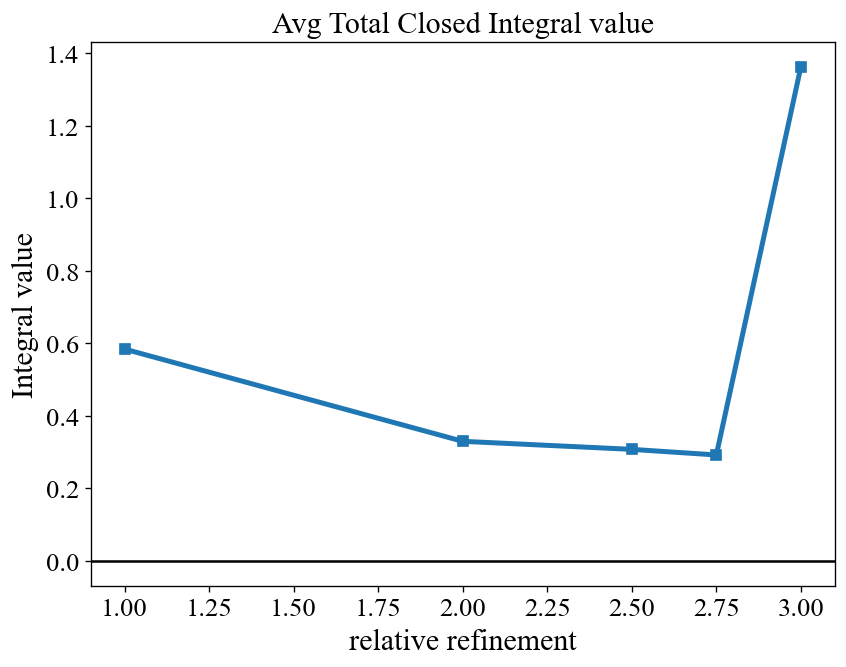

In [24]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
plt.rcParams['font.sans-serif'] = "Arial"


plt.plot(refinements, avgTotCloseds, label='total closed int', lw=3, marker='s')
#plt.plot(sizes, avgRibSurfInts, label='riblet surface int', lw=3)

ax.set_title('Avg Total Closed Integral value', fontsize=18)
ax.set_xlabel('relative refinement', fontsize=18)
ax.set_ylabel('Integral value', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

plt.hlines(0, -1, 5)
plt.xlim(0.9, 3.1)

plt.savefig('total_closed_integrals.pdf', bbox_inches='tight')
plt.show()

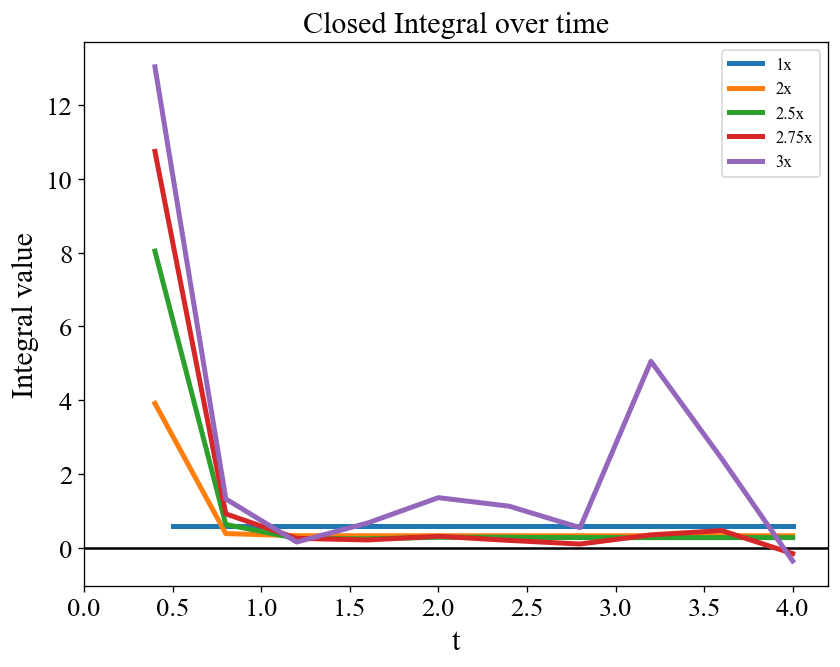

In [25]:
#print(totClosedIntegral_1x['t'])
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
plt.rcParams['font.sans-serif'] = "Arial"

plt.plot(totClosedIntegral_1x['t'][:8], totClosedIntegral_1x['F_x'][:8], label="1x", lw=3)
plt.plot(totClosedIntegral_2x['t'], totClosedIntegral_2x['F_x'], label="2x", lw=3)
plt.plot(totClosedIntegral_2_5x['t'], totClosedIntegral_2_5x['F_x'], label="2.5x", lw=3)
plt.plot(totClosedIntegral_2_75x['t'], totClosedIntegral_2_75x['F_x'], label="2.75x", lw=3)
plt.plot(totClosedIntegral_3x['t'], totClosedIntegral_3x['F_x'], label="3x", lw=3)

plt.hlines(0, -1, 5)

ax.set_title('Closed Integral over time', fontsize=18)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('Integral value', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xlim(0, 4.2)
plt.legend()
plt.show()
#plt.semilogy()


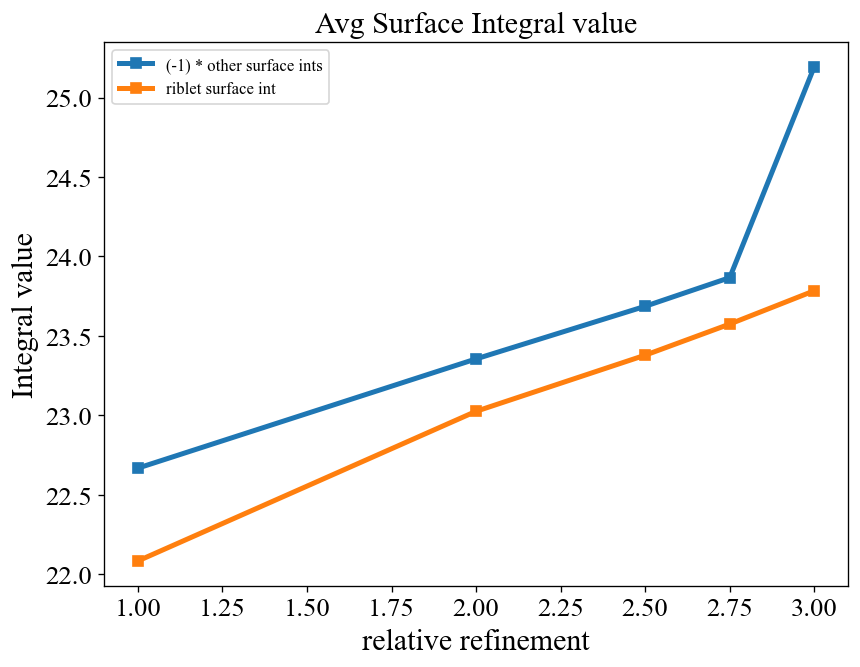

In [26]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
plt.rcParams['font.sans-serif'] = "Arial"


plt.plot(refinements, avgSurfInts, label='(-1) * other surface ints', lw=3, marker='s')
plt.plot(refinements, avgRibSurfInts, label='riblet surface int', lw=3, marker='s')

ax.set_title('Avg Surface Integral value', fontsize=18)
ax.set_xlabel('relative refinement', fontsize=18)
ax.set_ylabel('Integral value', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

plt.legend()
plt.savefig('surface_integrals.pdf', bbox_inches='tight')

plt.show()

[0.5841689999999997, 0.32983366666666664, 0.307651, 0.29220393333333333, 1.362442333333333]
[2.610844703453281, 1.4221361076534578, 1.3075006114449481, 1.2317906635073574, 5.755896325331834]


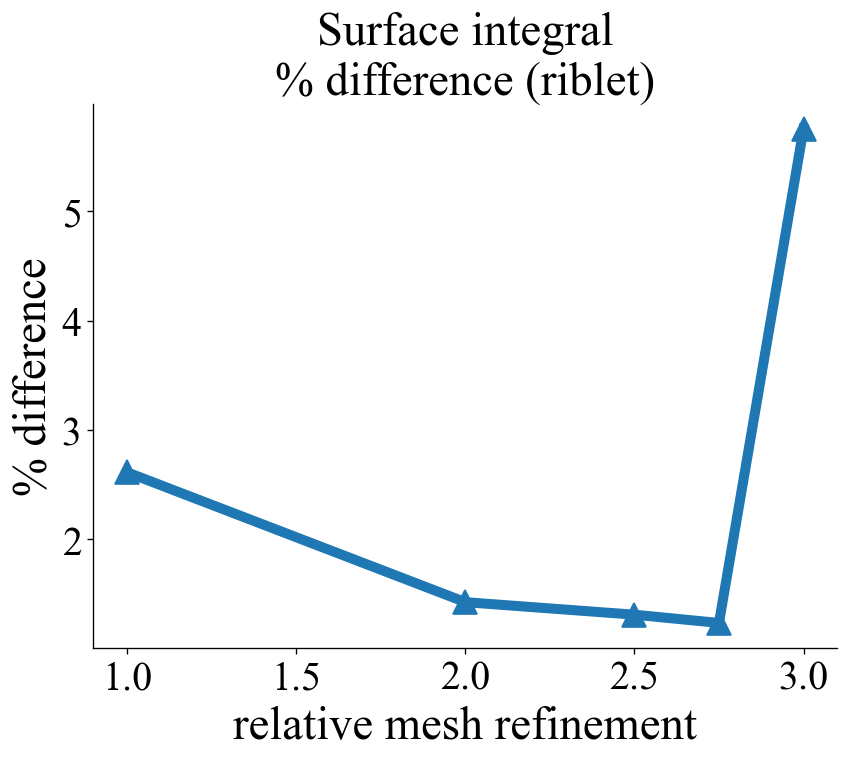

In [27]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
plt.rcParams['font.sans-serif'] = "Arial"

diff = [(s-r)/((s+r)/2.)*100. for s, r in zip(avgSurfInts, avgRibSurfInts)]
print(avgTotCloseds)
print(diff)

ax.plot(refinements, diff, label='integral differences', lw=6, marker='^', ms=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.set_title('Surface integral\n% difference (riblet)', fontsize=28)
ax.set_xlabel('relative mesh refinement', fontsize=28)
ax.set_ylabel('% difference', fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=24)
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

#plt.legend()

plt.savefig('../../paper_plots/riblet_plots/difference_in_surface_integrals.pdf', bbox_inches='tight', dpi=330)
plt.show()

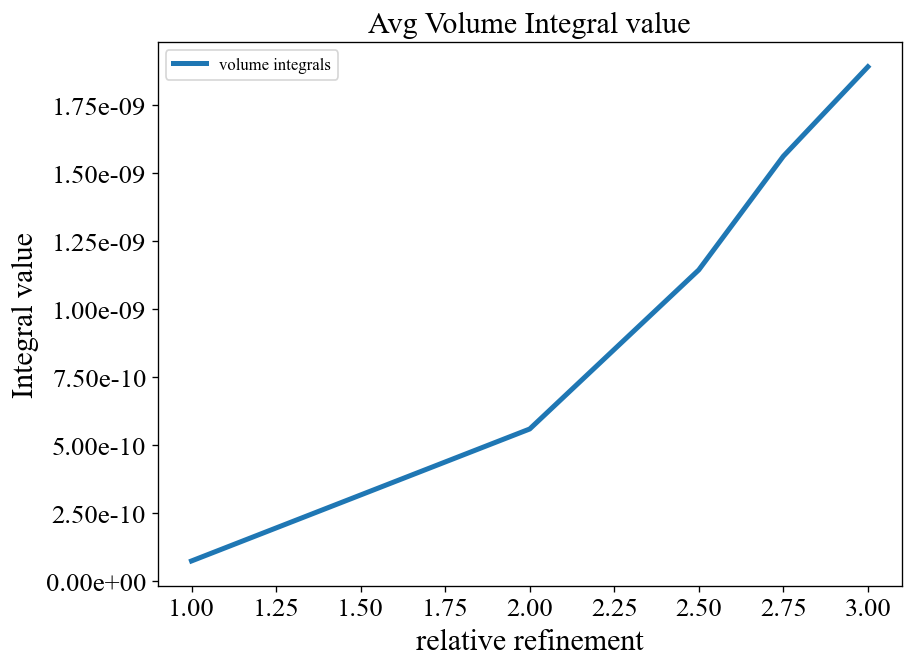

In [18]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
plt.rcParams['font.sans-serif'] = "Arial"


plt.plot(refinements, avgVolInts, label='volume integrals', lw=3)


ax.set_title('Avg Volume Integral value', fontsize=18)
ax.set_xlabel('relative refinement', fontsize=18)
ax.set_ylabel('Integral value', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

plt.legend()

plt.savefig('volume_integrals.pdf', bbox_inches='tight')
plt.show()

In [10]:
#see if the discrepancy decreases with mesh refinement for the same point in time

t_val = 2.
#differences between LHS and RHS
diff_1x_t2 = float(dragIntegral_1x.loc[dragIntegral_1x['t'] == t_val]['F_x'] - ribletIntegral_1x[ribletIntegral_1x['t'] == t_val]['F_x'])
diff_2x_t2 = float(dragIntegral_2x.loc[dragIntegral_2x['t'] == t_val]['F_x'] - ribletIntegral_2x[ribletIntegral_2x['t'] == t_val]['F_x'])
diff_2_5x_t2 = float(dragIntegral_2_5x.loc[dragIntegral_2_5x['t'] == t_val]['F_x'] - ribletIntegral_2_5x[ribletIntegral_2_5x['t'] == t_val]['F_x'])
diff_2_75x_t2 = float(dragIntegral_2_75x.loc[dragIntegral_2_75x['t'] == t_val]['F_x'] - ribletIntegral_2_75x[ribletIntegral_2_75x['t'] == t_val]['F_x'])
diff_3x_t2 = float(dragIntegral_3x.loc[dragIntegral_3x['t'] == t_val]['F_x'] - ribletIntegral_3x[ribletIntegral_3x['t'] == t_val]['F_x'])

diffs_t2 = [t_val, diff_1x_t2, diff_2x_t2, diff_2_5x_t2, diff_2_75x_t2, diff_3x_t2]
print(diffs_t2)

t_val = 4.
#differences between LHS and RHS
diff_1x_t4 = float(dragIntegral_1x.loc[dragIntegral_1x['t'] == t_val]['F_x'] - ribletIntegral_1x[ribletIntegral_1x['t'] == t_val]['F_x'])
diff_2x_t4 = float(dragIntegral_2x.loc[dragIntegral_2x['t'] == t_val]['F_x'] - ribletIntegral_2x[ribletIntegral_2x['t'] == t_val]['F_x'])
diff_2_5x_t4 = float(dragIntegral_2_5x.loc[dragIntegral_2_5x['t'] == t_val]['F_x'] - ribletIntegral_2_5x[ribletIntegral_2_5x['t'] == t_val]['F_x'])
diff_2_75x_t4 = float(dragIntegral_2_75x.loc[dragIntegral_2_75x['t'] == t_val]['F_x'] - ribletIntegral_2_75x[ribletIntegral_2_75x['t'] == t_val]['F_x'])
diff_3x_t4 = float(dragIntegral_3x.loc[dragIntegral_3x['t'] == t_val]['F_x'] - ribletIntegral_3x[ribletIntegral_3x['t'] == t_val]['F_x'])

diffs_t4 = [t_val, diff_1x_t1, diff_2x_t1, diff_2_5x_t1, diff_2_75x_t1, diff_3x_t1]
print(diffs_t4)

[2.0, 0.5841999999999992, 0.32319999999999993, 0.2818000000000005, 0.3091000000000008, 1.3557000000000023]


NameError: name 'diff_1x_t1' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=120)
plt.rcParams['font.sans-serif'] = "Arial"


plt.plot(refinements, diffs_t2[1:], label='RHS-LHS t = '+str(diffs_t2[0]), lw=3)
plt.plot(refinements, diffs_t4[1:], label='RHS-LHS t = '+str(diffs_t4[0]), lw=3)

ax.set_title('Integral discrepancy vs refinement at time t', fontsize=18)
ax.set_xlabel('relative refinement', fontsize=18)
ax.set_ylabel('Difference in integrals', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

plt.legend()
# plt.ylim(0,0.75)
# plt.savefig('RHS-LHS_refinement.pdf', bbox_inches='tight')
plt.show()